# In this model we are going to predict the "Average Price" of Avocado in the given dataset

# Importing the required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Loading the Dataset

In [7]:
a = pd.read_csv("Avocado.csv")
a.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# Exploratory Data Analysis

In [8]:
a.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
a.shape

(16468, 14)

In [43]:
a.count()

Unnamed: 0      1517
Date            1517
AveragePrice    1517
Total Volume    1517
4046            1517
4225            1517
4770            1517
Total Bags      1517
Small Bags      1517
Large Bags      1517
XLarge Bags     1517
type            1517
year            1517
region          1517
dtype: int64

The data set has only 1517 values in each column, hence we can drop the rest null values as described in the problem statement.

In [44]:
a.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [53]:
b=a.dropna()
b

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [54]:
b.shape

(1517, 14)

b is the dataset now in which we are goignt to build since the null values are dropped from a

In [55]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [59]:
target = b.AveragePrice            #renaming the AveragePrice as target
target

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [61]:
b.drop(['AveragePrice'], axis = 1, inplace = True)
b

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


Dropped the column 'AveragePrice' since it is the target variable(Y) as per the problem statement which needs to be predicted.

In [62]:
c = b

In [63]:
c

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [65]:
c['target'] = target       # adding the target value in the dataset again
c                      

<ipython-input-65-1b018f5dc5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['target'] = target


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,target
0,0.0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,1.33
1,1.0,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,1.35
2,2.0,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,0.93
3,3.0,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,1.08
4,4.0,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,1.39
1513,11.0,09-10-2016,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,1.51
1514,12.0,02-10-2016,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,1.48
1515,13.0,25-09-2016,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,1.47


In [67]:
c.shape

(1517, 14)

In [70]:
c.dtypes

Unnamed: 0      float64
Date             object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
target          float64
dtype: object

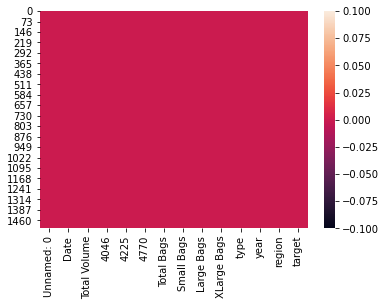

In [73]:
sns.heatmap(c.isnull())

we can observe that there are no null values in the dataset

In [74]:
c.describe()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,target
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,26.995386,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,1.074990
std,14.848287,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,0.188891
min,0.000000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.490000
25%,14.000000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,0.980000
50%,29.000000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,1.080000
75%,39.000000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,1.190000
max,51.000000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,1.680000


Here we can observe that std is higher than mean for Total Volume, Total Bags, Small Bags and XLarge Bags
hence the data dispersion is higher for these columns and outliers are present.

Mean is higher than the median in columns like 4225, XLarge Bags hence skewness is present.

Huge difference between 75th percentile and maximum value in columns like Total Bags, Small Bags, XLarge Bags
it firmly confirms the presence of outliers. 

In [75]:
c.skew()

Unnamed: 0     -0.234824
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
target         -0.109444
dtype: float64

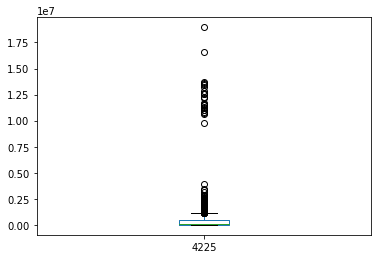

In [76]:
c['4225'].plot.box()

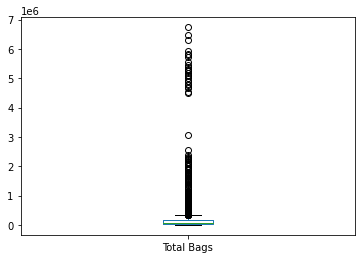

In [77]:
c['Total Bags'].plot.box()

Unnamed: 0         AxesSubplot(0.125,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.390714,0.125;0.110714x0.343182)
year               AxesSubplot(0.523571,0.125;0.110714x0.343182)
target             AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

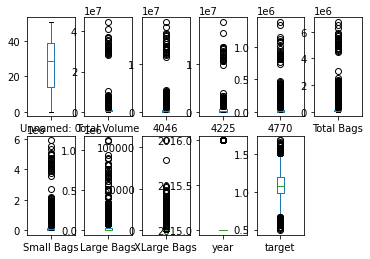

In [83]:
c.plot(kind= 'box', subplots = True, layout = (2,6))

In [87]:
c['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [88]:
c['region'].describe()

count           1517
unique            51
top       California
freq              76
Name: region, dtype: object

In [89]:
c['type'].unique()

array(['conventional'], dtype=object)

In [91]:
c['type'].describe()

count             1517
unique               1
top       conventional
freq              1517
Name: type, dtype: object

In [97]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
   
c['region']= label_encoder.fit_transform(c['region']) 
  
c['region'].unique()

<ipython-input-97-188c8a571d95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['region']= label_encoder.fit_transform(c['region'])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [98]:
label_encoder = preprocessing.LabelEncoder() 
   
c['type']= label_encoder.fit_transform(c['type']) 
  
c['type'].unique()

<ipython-input-98-5037d0952423>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['type']= label_encoder.fit_transform(c['type'])


array([0])

In [150]:
c

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,NaN,2015.0,0,1.33
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,NaN,2015.0,0,1.35
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,NaN,2015.0,0,0.93
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,NaN,2015.0,0,1.08
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,NaN,2015.0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,190846.01,57529.11,10.939633,17531.78,59418.46,48823.53,10354.65,1.701434,2016.0,7,1.39
1513,11.0,29,178235.75,43325.87,10.862639,19419.57,63300.70,54704.14,8596.56,NaN,2016.0,7,1.51
1514,12.0,5,178410.82,46364.75,10.876033,16736.92,62415.77,53332.61,8258.16,1.904401,2016.0,7,1.48
1515,13.0,83,189131.52,54110.79,10.889185,17495.42,63931.73,55653.47,8278.26,NaN,2016.0,7,1.47


In [103]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   int32  
 11  year          1517 non-null   float64
 12  region        1517 non-null   int64  
 13  target        1517 non-null   float64
dtypes: float64(11), int32(1), int64(1), object(1)
memory usage: 171.8+ KB


In [104]:
label_encoder = preprocessing.LabelEncoder() 
   
c['Date']= label_encoder.fit_transform(c['Date']) 
  
c['Date'].unique()

<ipython-input-104-60f99355f00e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Date']= label_encoder.fit_transform(c['Date'])


array([ 92,  68,  44,  20,  98,  75,  51,  27,   3,  84,  60,  36,  12,
        90,  66,  42,  18,  99,  76,  52,  28,   4,  88,  64,  40,  16,
        94,  70,  46,  22, 102,  80,  56,  32,   8,  86,  62,  38,  14,
        96,  73,  49,  25,   1,  72,  48,  24,   0,  82,  58,  34,  10,
        85,  61,  37,  13,  91,  67,  43,  19, 100,  77,  53,  29,   5,
        83,  59,  26,   2,  79,  55,  31,   7,  89,  65,  41,  17,  93,
        69,  45,  21, 101,  39,  15,  97,  74,  50,  78,  54,  30,   6,
        35,  11,  95,  71,  47,  23, 103,  81,  57,  33,   9,  87,  63])

In [148]:
c                         # after coverting all columns into numerical datatype using label encoding method

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,NaN,2015.0,0,1.33
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,NaN,2015.0,0,1.35
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,NaN,2015.0,0,0.93
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,NaN,2015.0,0,1.08
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,NaN,2015.0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,190846.01,57529.11,10.939633,17531.78,59418.46,48823.53,10354.65,1.701434,2016.0,7,1.39
1513,11.0,29,178235.75,43325.87,10.862639,19419.57,63300.70,54704.14,8596.56,NaN,2016.0,7,1.51
1514,12.0,5,178410.82,46364.75,10.876033,16736.92,62415.77,53332.61,8258.16,1.904401,2016.0,7,1.48
1515,13.0,83,189131.52,54110.79,10.889185,17495.42,63931.73,55653.47,8278.26,NaN,2016.0,7,1.47


In [107]:
#removing outliers

from scipy.stats import zscore

z = np.abs(zscore(c))
z

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[1.81868039, 1.37776563, 0.34696593, ..., 0.44100815, 1.3143384 ,
        1.35048079],
       [1.75131034, 0.57857991, 0.34907791, ..., 0.44100815, 1.3143384 ,
        1.45639674],
       [1.6839403 , 0.22060582, 0.33478463, ..., 0.44100815, 1.3143384 ,
        0.76783831],
       ...,
       [1.01023983, 1.51928262, 0.32120275, ..., 2.26753179, 0.88028586,
        2.14485045],
       [0.94286978, 1.07807099, 0.31878364, ..., 2.26753179, 0.88028586,
        2.09189247],
       [0.87549974, 0.27888526, 0.3201721 , ..., 2.26753179, 0.88028586,
        1.88006056]])

In [173]:
threshold = 3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


<ipython-input-173-d593e7e1e7cc>:2: RuntimeWarning: invalid value encountered in less
  print(np.where(z<3))


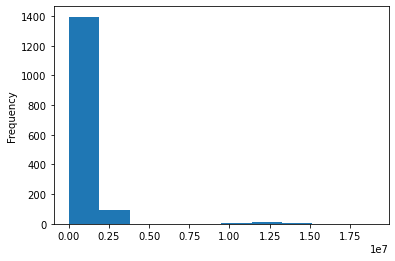

In [109]:
c['4225'].plot.hist()

Right skewness is present in this column

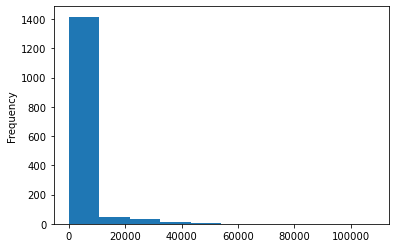

In [110]:
c['XLarge Bags'].plot.hist()

Right skewness is present in this column

In [112]:
# Removing Skewness using boxcox function

from scipy.stats import boxcox

c['4225'] = boxcox(c['4225'],0)

<ipython-input-112-ca48399de98f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['4225'] = boxcox(c['4225'],0)


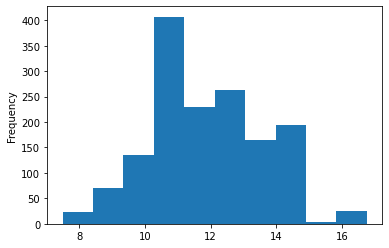

In [113]:
c['4225'].plot.hist()

Skewness is removed in the column "4225"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-123-7616ff113ced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['XLarge Bags'] = np.log(c['XLarge Bags'])


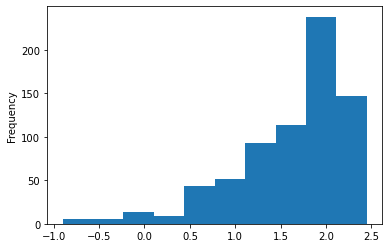

In [123]:
from scipy.stats import boxcox
c['XLarge Bags'] = np.log(c['XLarge Bags'])
c['XLarge Bags'].plot.hist()

In [146]:
c_corr = c.corr()

In [147]:
c_corr

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
Unnamed: 0,1.000000,-0.145600,0.091934,0.092013,0.051548,0.075647,0.081007,0.083485,0.065364,-0.013842,-0.012854,0.012123,-0.075531
Date,-0.145600,1.000000,-0.024767,-0.020773,-0.048533,-0.016382,-0.010990,-0.005656,-0.040195,0.007220,0.022750,-0.026002,0.092984
Total Volume,0.091934,-0.024767,1.000000,0.985568,0.573142,0.934347,0.967689,0.960642,0.910226,0.279664,-0.004189,0.236579,-0.140470
4046,0.092013,-0.020773,0.985568,1.000000,0.524052,0.898570,0.930395,0.922278,0.884229,0.253867,-0.040439,0.269481,-0.190096
4225,0.051548,-0.048533,0.573142,0.524052,1.000000,0.551818,0.591901,0.590309,0.537750,0.298768,0.005153,0.134606,-0.129463
4770,0.075647,-0.016382,0.934347,0.898570,0.551818,1.000000,0.926405,0.923607,0.840523,0.387142,0.029222,0.138092,-0.100567
Total Bags,0.081007,-0.010990,0.967689,0.930395,0.591901,0.926405,1.000000,0.997341,0.911336,0.331905,0.090108,0.190001,-0.111597
Small Bags,0.083485,-0.005656,0.960642,0.922278,0.590309,0.923607,0.997341,1.000000,0.879131,0.339271,0.106382,0.168650,-0.097682
Large Bags,0.065364,-0.040195,0.910226,0.884229,0.537750,0.840523,0.911336,0.879131,1.000000,0.241207,-0.018678,0.297452,-0.177480
XLarge Bags,-0.013842,0.007220,0.279664,0.253867,0.298768,0.387142,0.331905,0.339271,0.241207,1.000000,0.135424,-0.117052,0.009959


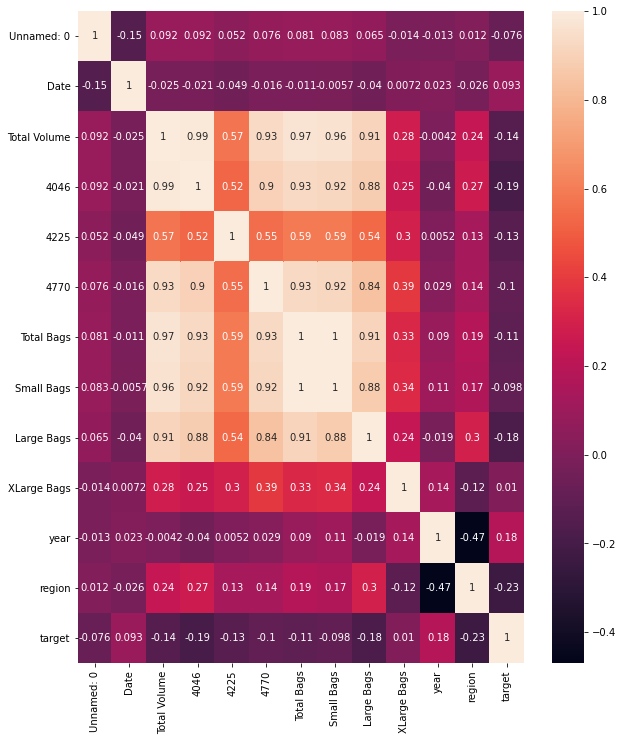

In [151]:
plt.figure(figsize=(10,12))
sns.heatmap(c_corr, annot = True)

"Type" is not contributing and correlated with the target since only one value is present,
hence we have dropped the column "Type"

Also here we can observe that year is positively correlated with the target(Average Price)

In [153]:

c

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,NaN,2015.0,0,1.33
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,NaN,2015.0,0,1.35
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,NaN,2015.0,0,0.93
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,NaN,2015.0,0,1.08
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,NaN,2015.0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,190846.01,57529.11,10.939633,17531.78,59418.46,48823.53,10354.65,1.701434,2016.0,7,1.39
1513,11.0,29,178235.75,43325.87,10.862639,19419.57,63300.70,54704.14,8596.56,NaN,2016.0,7,1.51
1514,12.0,5,178410.82,46364.75,10.876033,16736.92,62415.77,53332.61,8258.16,1.904401,2016.0,7,1.48
1515,13.0,83,189131.52,54110.79,10.889185,17495.42,63931.73,55653.47,8278.26,NaN,2016.0,7,1.47


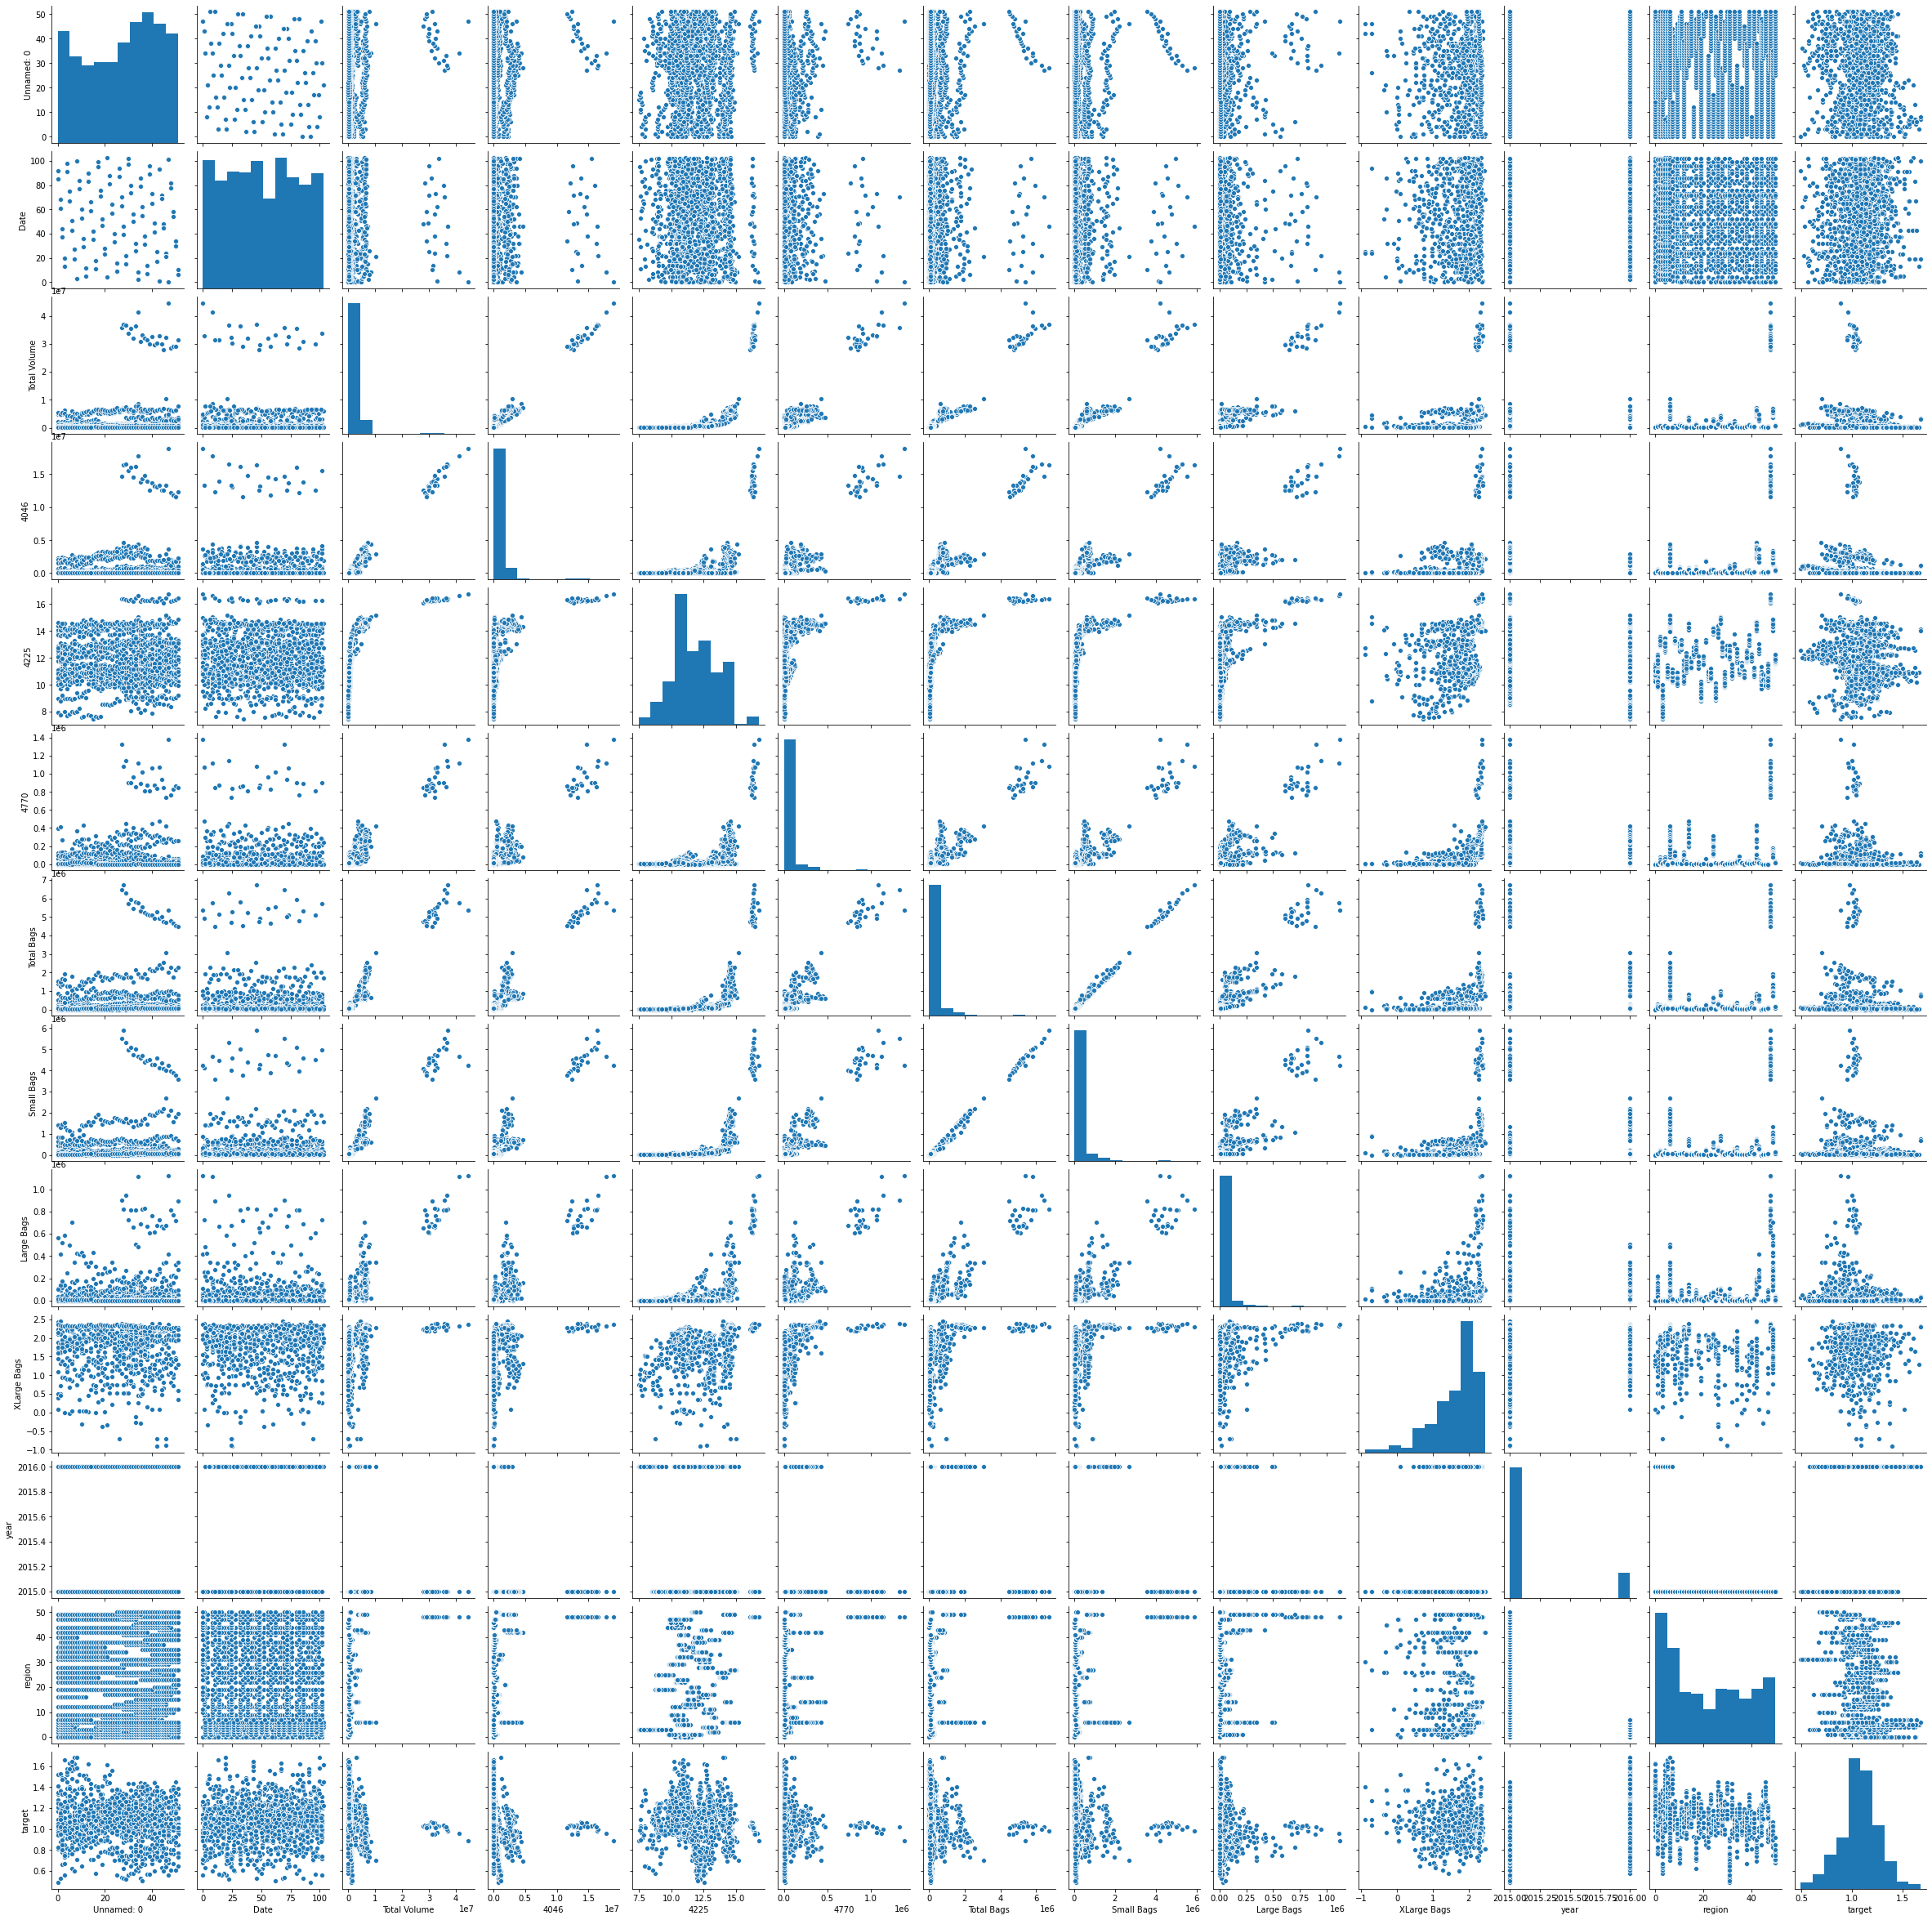

In [154]:
sns.pairplot(c)

In [184]:
import warnings
warnings.simplefilter("ignore")

In [222]:
c

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,NaN,2015.0,0,1.33
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,NaN,2015.0,0,1.35
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,NaN,2015.0,0,0.93
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,NaN,2015.0,0,1.08
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,NaN,2015.0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,190846.01,57529.11,10.939633,17531.78,59418.46,48823.53,10354.65,1.701434,2016.0,7,1.39
1513,11.0,29,178235.75,43325.87,10.862639,19419.57,63300.70,54704.14,8596.56,NaN,2016.0,7,1.51
1514,12.0,5,178410.82,46364.75,10.876033,16736.92,62415.77,53332.61,8258.16,1.904401,2016.0,7,1.48
1515,13.0,83,189131.52,54110.79,10.889185,17495.42,63931.73,55653.47,8278.26,NaN,2016.0,7,1.47


In [223]:
c.fillna('0', inplace = True)
c

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,target
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,0,2015.0,0,1.33
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,0,2015.0,0,1.35
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,0,2015.0,0,0.93
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,0,2015.0,0,1.08
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,0,2015.0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,190846.01,57529.11,10.939633,17531.78,59418.46,48823.53,10354.65,1.70143,2016.0,7,1.39
1513,11.0,29,178235.75,43325.87,10.862639,19419.57,63300.70,54704.14,8596.56,0,2016.0,7,1.51
1514,12.0,5,178410.82,46364.75,10.876033,16736.92,62415.77,53332.61,8258.16,1.9044,2016.0,7,1.48
1515,13.0,83,189131.52,54110.79,10.889185,17495.42,63931.73,55653.47,8278.26,0,2016.0,7,1.47


In [224]:
x = c.iloc[:, 0:-1]
x.head()


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,92,64236.62,1036.74,10.905127,48.16,8696.87,8603.62,93.25,0,2015.0,0
1,1.0,68,54876.98,674.28,10.706359,58.33,9505.56,9408.07,97.49,0,2015.0,0
2,2.0,44,118220.22,794.70,11.600475,130.50,8145.35,8042.21,103.14,0,2015.0,0
3,3.0,20,78992.15,1132.00,11.184094,72.58,5811.16,5677.40,133.76,0,2015.0,0
4,4.0,98,51039.60,941.48,10.688265,75.78,6183.95,5986.26,197.69,0,2015.0,0


In [225]:
y = c.iloc[:,-1]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: target, dtype: float64

# Building a ML Model

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .33, random_state = 42)

In [228]:
x_train.shape

(1016, 12)

In [229]:
y_train.shape

(1016,)

In [230]:
x_test.shape

(501, 12)

In [231]:
y_test.shape

(501,)

In [232]:
lm = LinearRegression()

In [233]:
lm.fit(x_train,y_train)

LinearRegression()

In [234]:
lm.coef_

array([-1.01196306e-03,  2.70806122e-04,  1.42051422e-07, -2.45434300e-07,
       -2.14334270e-02, -1.35577879e-07, -1.84375870e-06,  1.76417657e-06,
        1.15587419e-06, -9.67281019e-03,  5.71382877e-02, -8.60733496e-04])

In [235]:
lm.intercept_

-113.78308861591525

In [236]:
lm.score(x_train,y_train)

0.20245369494212873

In [237]:
pred = lm.predict(x_test)

print("Predicted Average Price", pred)
print("Actual Average Price", y_test)

Predicted Average Price [1.09705988 1.10539345 1.14946077 1.19156761 1.08597471 1.03669815
 1.06246192 1.04859027 1.15011087 1.06374835 1.07976112 1.14839475
 1.11344115 0.98205027 1.10093688 1.18197479 1.2247727  1.07094607
 1.08090955 1.09961955 1.13003806 1.15692677 1.08421524 1.07033276
 1.07161632 0.96396054 1.0976204  1.00669493 1.10531697 0.99837
 1.09056124 1.06921736 1.09204044 1.08546763 1.01310486 1.15563999
 1.0942491  1.00094526 1.07557944 1.07458251 1.04965947 1.12688024
 1.19942678 1.09099753 0.8054214  1.08471812 1.07562549 1.06749299
 1.17585819 1.04905714 1.18729813 1.03817649 1.154138   1.11173301
 1.11455724 1.0975202  1.11196055 1.09639996 1.07363927 1.11003873
 1.11921188 1.11087742 1.06461099 1.04385743 1.0701536  0.86996062
 0.96295234 1.10700883 0.99745934 1.05620127 1.08606678 1.02386527
 1.05220074 1.06664477 1.08584782 1.01368134 1.05742022 1.43720877
 1.06749557 0.84945815 1.13211323 1.01891508 1.05268916 0.94370445
 1.09054068 1.01280953 0.92294533 1.04413

In [238]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1282032923050958
Mean Squared Error: 0.02751741344208727
Root Mean Squared Error: 0.16588373471225945


In [239]:
from sklearn.metrics import r2_score

In [240]:
print(r2_score(y_test, pred))

0.2064270028617825


Hence we have build the machine learning model using linear regression technique to predict the Average Price of Avocado